[![View notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Jaruga_and_Pawlowska_2018/fig_3.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Jaruga_and_Pawlowska_2018/fig_3.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Jaruga_and_Pawlowska_2018/fig_3.ipynb)

#### based on Jaruga and Pawlowska (Geosci. Model Dev. 11)  "_libcloudph++ 2.0: aqueous-phase chemistry extension of the particle-based cloud microphysics scheme_"   
https://doi.org/10.5194/gmd-11-3623-2018

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [ ]:
from PySDM_examples.Kreidenweis_et_al_2003 import Settings, Simulation
from PySDM.physics import si
from open_atmos_jupyter_utils import show_plot
from PySDM.products import AqueousMassSpectrum
from PySDM.products.aqueous_chemistry.aqueous_mass_spectrum import SpecificAqueousMassSpectrum
from matplotlib import pyplot
import os

In [3]:
settings = Settings(dt=1*si.s, n_sd=16 if 'CI' in os.environ else 256, n_substep=5)
products = (
    SpecificAqueousMassSpectrum(
        key="S_VI",
        dry_radius_bins_edges=settings.dry_radius_bins_edges,
        name='dm_S_VI/dlog_10(dry diameter)_spec',
        unit='ug/kg'
    ),
    AqueousMassSpectrum(
        key="S_VI",
        dry_radius_bins_edges=settings.dry_radius_bins_edges,
        name='dm_S_VI/dlog_10(dry diameter)',
        specific=False,
        unit='ug/m^3'
    ),
)
simulation = Simulation(settings, products)
output = simulation.run()

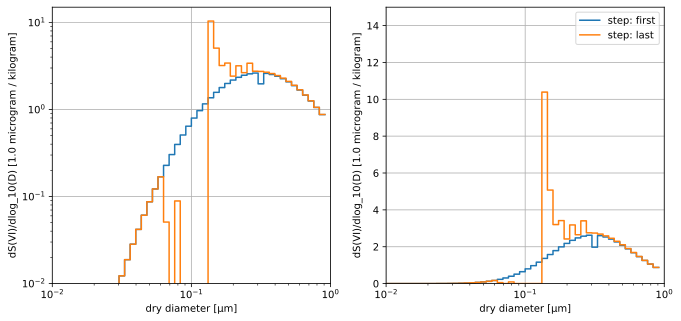

HTML(value="<a href='./fig_3' target='_blank'>./fig_3</a><br>")

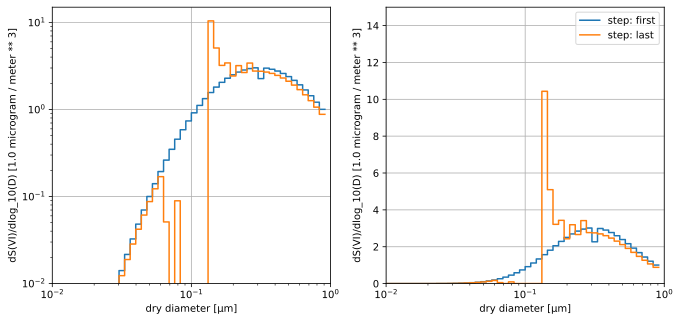

HTML(value="<a href='./fig_3' target='_blank'>./fig_3</a><br>")

In [4]:
for product in products:
    fig, axs = pyplot.subplots(1, 2, figsize=(11,5))
    labels = {0:"first", -1:"last"}
    for ax in axs:
        for step, label in labels.items():
            ax.step(
                2e6 * settings.dry_radius_bins_edges[:-1],
                output[product.name][step],
                label=f'step: {label}'
            )
        ax.set_ylabel(f'dS(VI)/dlog_10(D) [{product.unit}]')
        ax.set_xlabel('dry diameter [µm]')
        ax.set_xlim([.01, 1])
        ax.grid()
        ax.set_xscale('log')

    axs[0].set_yscale('log')
    axs[0].set_ylim([.01, 15])
    axs[1].set_ylim([0, 15])
    axs[1].legend()

    show_plot("fig_3")